This notebook identifies practices as part of our outlier detection who prescribed Pericyazine. The intention is that we write to them and outlying CCGs to ascertain the reasons why they use this so much compared to their peers.

In [1]:
#import libraries required for analysis
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from ebmdatalab import bq, charts, maps

Data Extract Here we identify all pericyazine prescribing. We identify all prescribing to generate measures for letters.

In [2]:
#code from original notebook - not used as CCG codes changed 
#sql = """
#SELECT
#  month,
#  pct,
#  practice,
#  name,
#  address1, 
#  address2, 
#  address4, 
#  address5, 
#  postcode,
#  SUM(items) AS total_pericyazine
#FROM
#  ebmdatalab.hscic.normalised_prescribing_standard AS presc
#INNER JOIN
#  ebmdatalab.hscic.practices prac
#ON
#  presc.practice = prac.code
#  AND (prac.setting = 4)
#WHERE
#  bnf_code LIKE "0402010P0%" 
###  AND
### (presc.month >= "2019-03-01" and presc.month  <= "2019-06-01")
# ## AND items > 1
#GROUP BY
#  month,
#  pct,
#  practice,
#  name,
#  address1, 
#  address2, 
#  address4, 
#  address5, 
#  postcode
#ORDER BY
#  presc.month,
#  practice
#"""

#pericyazine = bq.cached_read(sql, csv_path='pericyazine_df.csv')
#pericyazine['month'] = pericyazine['month'].astype('datetime64[ns]')
#pericyazine.head(10)
importfile = os.path.join("..","data","pericyazine_df.csv") #set path for data cache
pericyazine = pd.read_csv(importfile)
pericyazine['month'] = pericyazine['month'].astype('datetime64[ns]')
pericyazine.head(10)

,month,pct,practice,name,address1,address2,address4,address5,postcode,total_pericyazine
0,2010-08-01,00K,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,CLEVELAND,NaN,TS18 2AW,1
1,2010-08-01,00M,A81045,THE COATHAM ROAD SURGERY,THE COATHAM SURGERY,COATHAM HEALTH VILLAGE,CLEVELAND,NaN,TS10 1SR,1
2,2010-08-01,00M,A81051,CAMBRIDGE MEDICAL GROUP,THE CAMBRIDGE MED. GROUP,10A CAMBRIDGE ROAD,CLEVELAND,NaN,TS5 5NN,1
3,2010-08-01,00M,A81053,WOODSIDE SURGERY,WOODSIDE SURGERY,"6 HIGH STREET,LOFTUS",CLEVELAND,NaN,TS13 4HW,1
4,2010-08-01,00K,A81632,LAWSON STREET PRACTICE,THE HEALTH CENTRE,LAWSON STREET,CLEVELAND,NaN,TS18 1HU,1
5,2010-08-01,01K,A82003,ULVERSTON HEALTH CENTRE (MURRAY),ULVERSTON COMM.HEALTH CTR,STANLEY STREET,CUMBRIA,NaN,LA12 7BT,4
6,2010-08-01,01H,A82047,JAMES STREET GROUP PRACT,JAMES STREET GROUP PRACT,JAMES STREET,CUMBRIA,NaN,CA14 2DL,6
7,2010-08-01,01K,A82650,HAVERTHWAITE SURGERY,HAVERTHWAITE SURGERY,"HAVERTHWAITE, BACKBARROW",CUMBRIA,NaN,LA12 8QF,2
8,2010-08-01,00D,A83015,STATION VIEW MEDICAL CENTRE,STATION VIEW MEDICAL CTR,29A ESCOMB ROAD,COUNTY DURHAM,NaN,DL14 6AB,6
9,2010-08-01,00D,A83057,EAST DURHAM MEDICAL GROUP,THE CARODOC SURGERY,FRONT STREET WEST,COUNTY DURHAM,NaN,TS28 5PZ,1


Here we identify the practices for writing to based on criteria in out methodology

- prescribing in last quarter
- at least 1 item

In [3]:
pericyazine_prescribers = pericyazine.loc[(pericyazine["month"]>= "2019-03-01") & (pericyazine["month"] <= "2019-06-01") & (pericyazine["total_pericyazine"] > 1)]
pericyazine_prescribers.head()

,month,pct,practice,name,address1,address2,address4,address5,postcode,total_pericyazine
55814,2019-03-01,00J,A83049,QUEENS ROAD SURGERY,QUEENS ROAD SURGERY,"83 QUEENS ROAD, BLACKHILL",COUNTY DURHAM,NaN,DH8 0BW,4
55815,2019-03-01,00J,A83072,LANCHESTER MEDICAL CENTRE,LANCHESTER MEDICAL CENTRE,DURHAM ROAD,COUNTY DURHAM,NaN,DH7 0LP,6
55817,2019-03-01,13T,A85611,PELAW MEDICAL PRACTICE,PELAW MEDICAL PRACTICE,"7-8 CROXDALE TCE, PELAW",TYNE & WEAR,NaN,NE10 0RR,4
55818,2019-03-01,13T,A86601,DENTON TURRET MEDICAL CENTRE,DENTON TURRET MEDICAL CTR,"10 KENLEY RD, SLATYFORD",NaN,NaN,NE5 2UY,4
55822,2019-03-01,03Q,B82005,PRIORY MEDICAL GROUP,PRIORY MEDICAL CENTRE,CORNLANDS ROAD,NORTH YORKSHIRE,NaN,YO24 3WX,6


In [4]:
pericyazine_prescribers['practice'].nunique()

364

In [6]:
#code from old notebook - used csvs created at the time
# get data for patient list size (all patients) so we can create a measure
#sql2 = """
#SELECT month,
#pct_id AS pct,
#practice,
#sum(total_list_size) as list_size
#FROM ebmdatalab.hscic.practice_statistics
#group by 
#month,
#pct,
#practice
#order by
#month, pct
#"""
#listsize_df = bq.cached_read(sql2, csv_path='list_size.csv')
#listsize_df['month'] = listsize_df['month'].astype('datetime64[ns]')
importfile = os.path.join("..","data","list_size.csv") #set path for data cache
listsize_df = pd.read_csv(importfile)
listsize_df['month'] = listsize_df['month'].astype('datetime64[ns]')

In [7]:
#merge dataframes so we can do measures with deciles
pericyazine_per_1000 = pd.merge(left = listsize_df, right = pericyazine, on=['month', 'practice'], how = 'left')
pericyazine_per_1000['pericyazine_per_1000'] = 1000* (pericyazine_per_1000['total_pericyazine']/pericyazine_per_1000['list_size'])
pericyazine_per_1000['pericyazine_per_1000'] = pericyazine_per_1000['pericyazine_per_1000'].fillna(0)
pericyazine_per_1000.head(5)

,month,pct_x,practice,list_size,pct_y,name,address1,address2,address4,address5,postcode,total_pericyazine,pericyazine_per_1000
0,2014-07-01,NaN,Y00613,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2014-07-01,NaN,Y00031,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2014-07-01,NaN,Y02926,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2014-07-01,00C,Y00142,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2014-07-01,00C,Y00382,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [8]:
exportfile = os.path.join("..","data","pericyazine_per_1000.csv") #set path for data cache
pericyazine_per_1000.to_csv(exportfile,index=False)

/root/.pyenv/versions/3.8.1/lib/python3.8/site-packages/ebmdatalab/charts.py:95: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/root/.pyenv/versions/3.8.1/lib/python3.8/site-packages/ebmdatalab/charts.py:95: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/root/.pyenv/versions/3.8.1/lib/python3.8/site-packages/ebmdatalab/charts.py:95: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/root/.pyenv/versions/3.8.1/lib/python3.8/site-packages/ebmdatalab/charts.py:95: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/roo

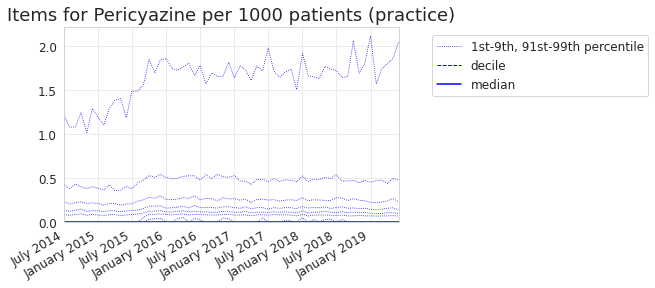

In [9]:
#create sample deciles chart
charts.deciles_chart(
        pericyazine_per_1000,
        period_column='month',
        column='pericyazine_per_1000',
        title="Items for Pericyazine per 1000 patients (practice)",
        show_outer_percentiles=True)

#add in example https://openprescribing.net/practice/D82099/ from West Norfolk
df_subject = pericyazine_per_1000.loc[pericyazine_per_1000['practice'] == 'D82099']
plt.plot(df_subject['month'], df_subject['pericyazine_per_1000'], 'r--')
plt.show()

In [10]:
ccg_pericyazine = pericyazine_per_1000.groupby(['pct_x', 'month']).sum().reset_index()
ccg_pericyazine['pericyazine_per_1000'] = 1000* (ccg_pericyazine['total_pericyazine']/ccg_pericyazine['list_size'])
ccg_pericyazine['pericyazine_per_1000'] = ccg_pericyazine['pericyazine_per_1000'].fillna(0)
ccg_pericyazine.rename(columns = {'pct_x':'pct'}, inplace = True)
ccg_pericyazine = ccg_pericyazine.loc[(ccg_pericyazine["list_size"] >= 2000)]
ccg_pericyazine.head(5)

,pct,month,list_size,address5,total_pericyazine,pericyazine_per_1000
0,00C,2014-07-01,106620,0.0,2.0,0.018758
1,00C,2014-08-01,106620,0.0,4.0,0.037516
2,00C,2014-09-01,106620,0.0,3.0,0.028137
3,00C,2014-10-01,106624,0.0,3.0,0.028136
4,00C,2014-11-01,106624,0.0,4.0,0.037515


/root/.pyenv/versions/3.8.1/lib/python3.8/site-packages/ebmdatalab/charts.py:95: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/root/.pyenv/versions/3.8.1/lib/python3.8/site-packages/ebmdatalab/charts.py:95: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/root/.pyenv/versions/3.8.1/lib/python3.8/site-packages/ebmdatalab/charts.py:95: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/root/.pyenv/versions/3.8.1/lib/python3.8/site-packages/ebmdatalab/charts.py:95: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b:" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/roo

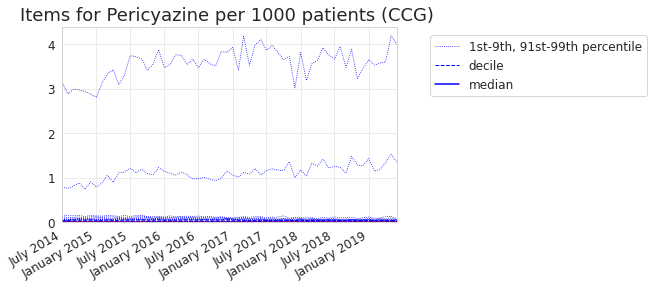

In [12]:
#create sample deciles chart
charts.deciles_chart(
        ccg_pericyazine,
        period_column='month',
        column='pericyazine_per_1000',
        title="Items for Pericyazine per 1000 patients (CCG) ",
        show_outer_percentiles=True)

#add in example Islington is 08H
df_subject = ccg_pericyazine.loc[ccg_pericyazine['pct'] == '08H']
plt.plot(df_subject['month'], df_subject['pericyazine_per_1000'], 'r--')
plt.show()

In [14]:
## here we look at CCGs that are outliers.
latest_ccg.sort_values("total_pericyazine", ascending=False).head(250)

,pct,month,list_size,address5,total_pericyazine,pericyazine_per_1000
6616,06W,2017-08-01,233022,0.0,1745.0,7.488563
6256,06M,2017-08-01,239050,0.0,972.0,4.066095
6556,06V,2017-08-01,173329,0.0,706.0,4.073179
6676,06Y,2017-08-01,226038,0.0,565.0,2.499580
6856,07J,2017-08-01,174632,0.0,235.0,1.345687
...,...,...,...,...,...,...
7216,07Q,2017-08-01,347607,0.0,0.0,0.000000
2263,02M,2017-08-01,151493,0.0,0.0,0.000000
2323,02N,2017-08-01,158876,0.0,0.0,0.000000
5656,05V,2017-08-01,148645,0.0,0.0,0.000000


In [15]:
exportfile = os.path.join("..","data","latest_ccg.csv") #set path for data cache
latest_ccg.to_csv(exportfile,index=False)

In [39]:
#create choropeth map of cost per 1000 patients using bespoke map function (derived from ebmdatalab library)
import glob
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pathlib import Path


def ccg_map_bespoke(
    df,
    title="",
    column=None,
    region=None,
    separate_region=False,
    region_layout="horizontal",
    cartogram=False,
    subplot_spec=None,
    show_legend=True,
    map_year=None,
    plot_options=None,
):
    """Draw a CCG map with area separated out
    """
    # Because this uses subplots to arrange London and England,
    # the only way to arrange nested subplots is via a subplotspec
    assert column, "You must specify a column name to plot"
    df = df.copy()
    # input df must have 'pct' column, plus others as specified
    data_dir = os.path.join("..","data")

    # Add names and if it's London. Note the names in ccg_for_map must
    # match names in the CCG geojson, as that doesn't include codes at
    # the momemt
    map_name = os.path.join(data_dir, "ccg_for_map.csv")
    names = pd.read_csv(map_name)

    # Check we know about all the codes in the input data
    diff = np.setdiff1d(df["pct"], names["code"])
    if len(diff) > 0:
        raise BaseException(
            "Data contains CCG codes we don't know about: {}".format(diff)
        )

    df = df.merge(names[["code", "name", "region"]], left_on="pct", right_on="code")
    df = df.set_index("name")

    # Load map data
    cartogram_suffix = ""
    if cartogram:
        cartogram_suffix = "_cartogram"
    if map_year:
        map_file = os.path.join(data_dir,"ccgs{}_{}.json").format(cartogram_suffix, map_year)
    else:
        map_file = sorted(
            glob.glob(str(os.path.join(data_dir,"ccgs{}_2*.json").format(cartogram_suffix)))
        )[-1]
    ccgs = gpd.read_file(map_file)
    # Normalise names to match `ccg_fo_map` format (above)
    ccgs["name"] = ccgs["name"].str.upper()
    ccgs = ccgs.set_index("name")
    # Remove ones without geometry - these are (usually) federations
    # rather than individual CCGs
    ccgs = ccgs[~ccgs["geometry"].isnull()]

    # Check we can map all the CCGs named in the input data
    diff = np.setdiff1d(df.index, ccgs.index)
    if len(diff) > 0:
        raise BaseException("Data contains CCG names we can't map: {}".format(diff))

    # Join map with data
    gdf = ccgs.join(df, rsuffix="_orig")

    # Split into london and rest of England
    gdf_region = gdf[gdf["region"] == region]
    gdf_roe = gdf

    # set common value limits for colour scale
    default_plot_options = {
        'vmin': df[column].min(),
        'vmax': df[column].max(),
        'edgecolor': "black",
        'linewidth': 0.1,
        'cmap': "OrRd",
    }

    if plot_options is None:
        plot_options = {}

    for k, v in default_plot_options.items():
        if k not in plot_options:
            plot_options[k] = v

    def plot(gdf, ax, title="", legend=True):
        gdf.plot(
            ax=ax,
            column=column,
            legend=legend,
            **plot_options
        )
        ax.set_aspect(1.63)
        if title:
            ax.set_title(title, size=12)
        ax.axis("off")

    fig = plt.gcf()
    if not subplot_spec:
        subplot_spec = gridspec.GridSpec(1, 1)[0]
    if separate_region:
        if region_layout == "horizontal":
            gs = gridspec.GridSpecFromSubplotSpec(
                nrows=1, ncols=2, width_ratios=[1, 2], subplot_spec=subplot_spec
            )
            ldn_ax = fig.add_subplot(gs[0, 0])
            roe_ax = fig.add_subplot(gs[0, 1])
        else:
            gs = gridspec.GridSpecFromSubplotSpec(
                nrows=2, ncols=1, height_ratios=[2, 1], subplot_spec=subplot_spec
            )
            roe_ax = fig.add_subplot(gs[0, 0])
            ldn_ax = fig.add_subplot(gs[1, 0])

        plot(
            gdf_roe,
            roe_ax,
            title="England".format(title),
            legend=show_legend,
        )
        plot(gdf_region, ldn_ax, title=region.format(title), legend=False)
    else:
        ax = plt.subplot(subplot_spec)
        plot(gdf, ax, title=title, legend=show_legend)
    fig.suptitle(title, fontsize='large')
    return plt

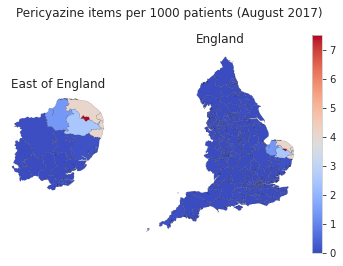

In [42]:
plt = ccg_map_bespoke(
    latest_ccg, 
    title="Pericyazine items per 1000 patients (August 2017)", 
    map_year = '2018',
    column='pericyazine_per_1000', region='East of England', separate_region=True,
    plot_options={'cmap': 'coolwarm'}
    )
exportfile = os.path.join("..","data","pericyazine_map.png")
plt.savefig(exportfile, dpi=300)